In [1]:
!pip install patchify

In [65]:
import os
import cv2
from PIL import Image 
import numpy as np 
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [66]:
dataset_root_folder = 'C:/Users/maana/OneDrive/Documents/SEM 6/ANN/'

In [67]:
dataset_name = "Semantic segmentation dataset"

In [68]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

C:/Users/maana/OneDrive/Documents/SEM 6/ANN/Semantic segmentation dataset\Tile 1\masks
C:/Users/maana/OneDrive/Documents/SEM 6/ANN/Semantic segmentation dataset\Tile 2\masks
C:/Users/maana/OneDrive/Documents/SEM 6/ANN/Semantic segmentation dataset\Tile 3\masks
C:/Users/maana/OneDrive/Documents/SEM 6/ANN/Semantic segmentation dataset\Tile 4\masks
C:/Users/maana/OneDrive/Documents/SEM 6/ANN/Semantic segmentation dataset\Tile 5\masks
C:/Users/maana/OneDrive/Documents/SEM 6/ANN/Semantic segmentation dataset\Tile 6\masks
C:/Users/maana/OneDrive/Documents/SEM 6/ANN/Semantic segmentation dataset\Tile 7\masks
C:/Users/maana/OneDrive/Documents/SEM 6/ANN/Semantic segmentation dataset\Tile 8\masks


In [69]:
image_patch_size = 256

In [70]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [71]:
image.shape

(544, 509, 3)

In [72]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [73]:
len(image_patches)

2

In [74]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [75]:
minmaxscaler = MinMaxScaler()

In [76]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [77]:
image_y[0].shape

(256, 256, 3)

In [78]:
print(type(image))

<class 'numpy.ndarray'>


In [79]:
type(Image.fromarray(image))

PIL.Image.Image

In [80]:
image.shape

(544, 509, 3)

In [81]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [82]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [83]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [84]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [85]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [86]:
type(image_dataset[0])

numpy.ndarray

In [87]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

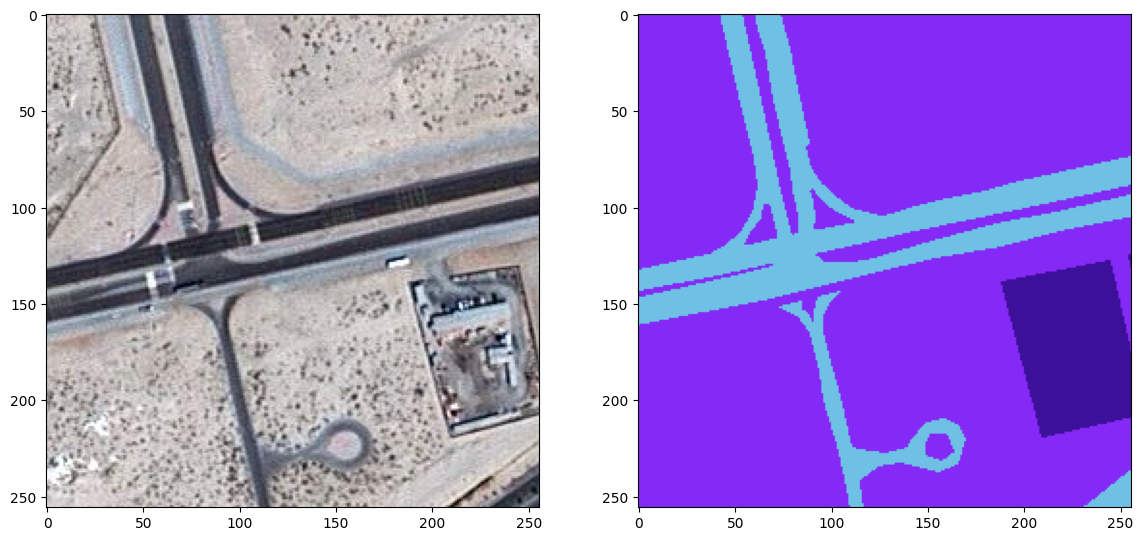

In [98]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [99]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [100]:
mask_dataset.shape[0]

945

In [101]:
label = individual_patched_mask

In [102]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [103]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [104]:
print(len(labels))

945


In [105]:
labels = np.array(labels)

In [106]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [107]:
labels = np.expand_dims(labels, axis=3)

In [108]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [109]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [110]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


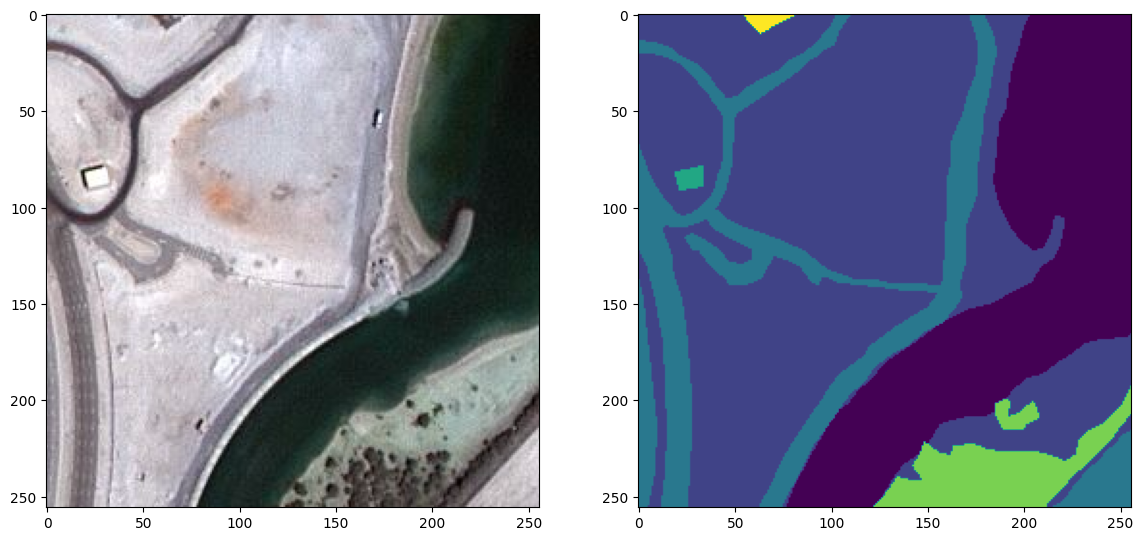

In [118]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [119]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [120]:
total_classes = len(np.unique(labels))

In [121]:
total_classes

6

In [122]:
from tensorflow.keras.utils import to_categorical 

In [123]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [124]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [125]:
master_trianing_dataset = image_dataset

In [126]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [129]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [130]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [131]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


Deep Learning with Satellite Imagery Data

In [132]:
!pip install -U segmentation-models

In [168]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [169]:
#from keras import backend as K

In [170]:
from tensorflow.keras import backend as K

In [171]:

def jaccard_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection  
    return intersection / union 

In [172]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

    inputs = Input((image_height, image_width, image_channels))
    
    source_input = inputs
    
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)
    
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)
    
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)
    
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)
    
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)
    
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)
    
    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)
    
    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)
    
    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)
    
    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [173]:
metrics = ["accuracy", jaccard_coef]

In [174]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [175]:
def get_deep_learning_model():
    return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [176]:
model = get_deep_learning_model()

In [177]:
model.get_config()

{'name': 'functional',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'cla

Generating Loss Function
dice loss > Focal Loss > Total Loss
Total Loss = (Dice loss + (1*Focal Loss))

In [178]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [179]:
!pip install --upgrade segmentation-models

In [180]:
import os
os.environ['SM_FRAMEWORK'] = 'tf.keras'
import segmentation_models as sm

In [181]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [182]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [183]:
total_loss = dice_loss + (1 * focal_loss)

Model compilation

In [184]:
import tensorflow as tf

In [185]:
tf.keras.backend.clear_session()

In [186]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [187]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 16)      │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256, 256, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 16)      │           2,320 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [188]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.4269 - jaccard_coef: 0.1864 - loss: 1.0200 - val_accuracy: 0.6372 - val_jaccard_coef: 0.3310 - val_loss: 0.9932
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6697 - jaccard_coef: 0.3537 - loss: 0.9855 - val_accuracy: 0.6880 - val_jaccard_coef: 0.3344 - val_loss: 0.9733
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6983 - jaccard_coef: 0.4009 - loss: 0.9685 - val_accuracy: 0.7098 - val_jaccard_coef: 0.4633 - val_loss: 0.9631
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7133 - jaccard_coef: 0.4657 - loss: 0.9602 - val_accuracy: 0.6812 - val_jaccard_coef: 0.4579 - val_loss: 0.9683
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7309 - jaccard_coef: 0.4928 - loss: 0.9559 - val_accuracy: 0.7055 - val_jaccard_coef: 0.4445 - val_loss: 0.9636
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7405 - jaccard_coef: 0.5006 - loss: 0.9530 - val_a

In [189]:
history_a = model_history

In [190]:
history_a.history

{'accuracy': [0.5315151810646057,
  0.6761780977249146,
  0.6990350484848022,
  0.7124502062797546,
  0.7354950904846191,
  0.7486862540245056,
  0.7616097331047058,
  0.7686629891395569,
  0.7771575450897217,
  0.785452127456665,
  0.8043086528778076,
  0.8092712759971619,
  0.8185115456581116,
  0.8267117142677307,
  0.8323751091957092,
  0.8352920413017273,
  0.8368017077445984,
  0.8432855010032654,
  0.8461936712265015,
  0.8469030261039734,
  0.8475992679595947,
  0.8508880734443665,
  0.8518206477165222,
  0.8565792441368103,
  0.8601780533790588,
  0.8607935309410095,
  0.858301043510437,
  0.8574875593185425,
  0.859014093875885,
  0.8607360124588013,
  0.8683651089668274,
  0.8699288368225098,
  0.8692591190338135,
  0.8669848442077637,
  0.8681519627571106,
  0.8711903095245361,
  0.8725658059120178,
  0.8756465315818787,
  0.8760382533073425,
  0.8758381605148315,
  0.878073513507843,
  0.8829439878463745,
  0.88267582654953,
  0.8803151249885559,
  0.8843063116073608,
  0.

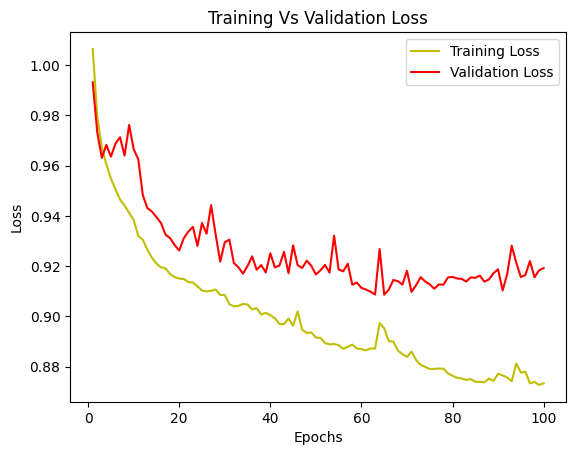

In [191]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

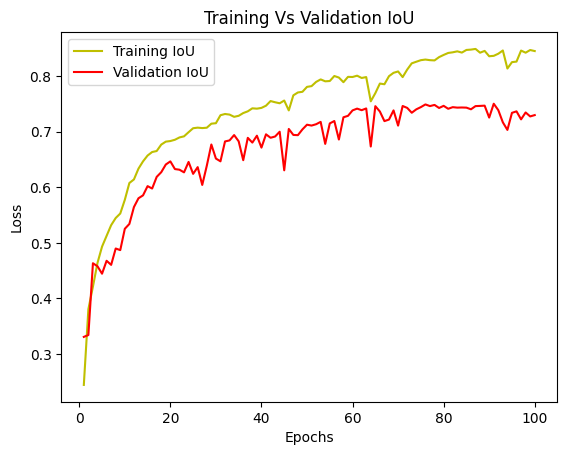

In [192]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [193]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [194]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 453ms/step


In [196]:
len(y_pred)

142

In [197]:
y_pred

array([[[[1.47701846e-02, 8.53341043e-01, 5.10056876e-02,
          5.97056076e-02, 1.96691677e-02, 1.50831905e-03],
         [4.60192235e-03, 9.30323422e-01, 3.10694184e-02,
          2.71772295e-02, 6.66799629e-03, 1.59991469e-04],
         [2.05587968e-03, 9.55188990e-01, 2.20879111e-02,
          1.80836264e-02, 2.51741242e-03, 6.61238810e-05],
         ...,
         [3.91172769e-04, 2.27975219e-01, 6.24189526e-03,
          7.60478377e-01, 4.87281941e-03, 4.05261671e-05],
         [7.06983323e-04, 3.13777357e-01, 1.14831692e-02,
          6.66087627e-01, 7.90073257e-03, 4.40664844e-05],
         [8.52259528e-03, 3.50616992e-01, 4.85685803e-02,
          5.62780559e-01, 2.88933814e-02, 6.17971120e-04]],

        [[3.38456035e-03, 9.41132665e-01, 2.67212223e-02,
          2.36753002e-02, 4.88985050e-03, 1.96415785e-04],
         [6.29210786e-04, 9.77717400e-01, 1.42614422e-02,
          5.97787742e-03, 1.39500084e-03, 1.91027193e-05],
         [3.43562075e-04, 9.79748785e-01, 1.4836

In [198]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [199]:
len(y_pred_argmax)

142

In [200]:
y_pred_argmax

array([[[1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[1, 2, 2, ..., 1, 1, 1],
        [1, 2, 2, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [201]:
y_test_argmax = np.argmax(y_test, axis=3)

In [202]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Comparing prediction results


In [203]:
import random

In [204]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


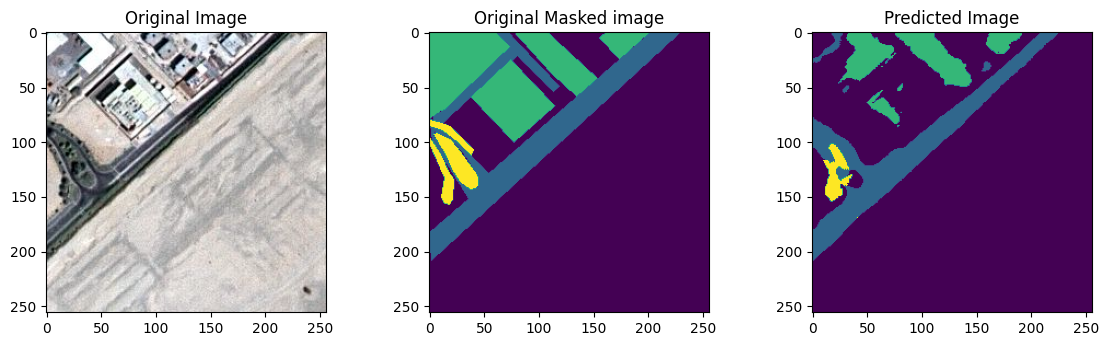

In [205]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [206]:
model.save("satellite_segmentation_full.h5")

In [ ]:
model.save("satellite_segmentation_full.keras")